In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("date-hour-soo-dest-2017.csv")
df.head()

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00


In [4]:
df.sample(7)

,Origin,Destination,Throughput,DateTime
120367,HAYW,ASHB,3,2017-01-05 18:00:00
145423,SANL,19TH,8,2017-01-06 16:00:00
160984,DALY,SANL,1,2017-01-07 10:00:00
13029,SSAN,DELN,2,2017-01-01 16:00:00
214398,ORIN,FTVL,6,2017-01-09 16:00:00
34857,MCAR,LAKE,5,2017-01-02 16:00:00
251123,24TH,12TH,6,2017-01-11 00:00:00


In [5]:
df["DateTime"].unique()

array(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
       '2017-01-01 02:00:00', '2017-01-01 03:00:00',
       '2017-01-01 04:00:00', '2017-01-01 05:00:00',
       '2017-01-01 06:00:00', '2017-01-01 07:00:00',
       '2017-01-01 08:00:00', '2017-01-01 09:00:00',
       '2017-01-01 10:00:00', '2017-01-01 11:00:00',
       '2017-01-01 12:00:00', '2017-01-01 13:00:00',
       '2017-01-01 14:00:00', '2017-01-01 15:00:00',
       '2017-01-01 16:00:00', '2017-01-01 17:00:00',
       '2017-01-01 18:00:00', '2017-01-01 19:00:00',
       '2017-01-01 20:00:00', '2017-01-01 21:00:00',
       '2017-01-01 22:00:00', '2017-01-01 23:00:00',
       '2017-01-02 00:00:00', '2017-01-02 01:00:00',
       '2017-01-02 02:00:00', '2017-01-02 03:00:00',
       '2017-01-02 04:00:00', '2017-01-02 05:00:00',
       '2017-01-02 06:00:00', '2017-01-02 07:00:00',
       '2017-01-02 08:00:00', '2017-01-02 09:00:00',
       '2017-01-02 10:00:00', '2017-01-02 11:00:00',
       '2017-01-02 12:00:00', '2017-01-02 13:0

In [6]:
#birleşik olan tarih bilgisni ayırıyoruz
df["DateTime"]=pd.to_datetime(df["DateTime"])

In [7]:
df['DateTime']=pd.to_datetime(df['DateTime'])
df['Year']=df['DateTime'].dt.year
df['Month']=df['DateTime'].dt.month
df['Weekday']=df['DateTime'].dt.dayofweek
df['Month_Name']=df['DateTime'].dt.month_name()
df['Weekday_Name']=df['DateTime'].dt.day_name()
df['Hour'] = df['DateTime'].dt.hour

df=df.drop('DateTime',axis=1)
df.head()

,Origin,Destination,Throughput,Year,Month,Weekday,Month_Name,Weekday_Name,Hour
0,12TH,19TH,1,2017,1,6,January,Sunday,0
1,12TH,24TH,2,2017,1,6,January,Sunday,0
2,12TH,BAYF,1,2017,1,6,January,Sunday,0
3,12TH,CIVC,5,2017,1,6,January,Sunday,0
4,12TH,COLS,2,2017,1,6,January,Sunday,0


In [8]:
df.sample(7) #rastgele yedi tanesi

,Origin,Destination,Throughput,Year,Month,Weekday,Month_Name,Weekday_Name,Hour
187681,RICH,CIVC,4,2017,1,6,January,Sunday,15
219159,LAFY,NBRK,1,2017,1,0,January,Monday,19
180013,12TH,SBRN,2,2017,1,6,January,Sunday,9
209504,EMBR,HAYW,7,2017,1,0,January,Monday,13
32529,SHAY,EMBR,1,2017,1,0,January,Monday,14
233634,PLZA,SFIA,2,2017,1,1,January,Tuesday,10
70539,24TH,LAFY,1,2017,1,1,January,Tuesday,23


In [9]:
df["Hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260218 entries, 0 to 260217
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Origin        260218 non-null  object
 1   Destination   260218 non-null  object
 2   Throughput    260218 non-null  int64 
 3   Year          260218 non-null  int64 
 4   Month         260218 non-null  int64 
 5   Weekday       260218 non-null  int64 
 6   Month_Name    260218 non-null  object
 7   Weekday_Name  260218 non-null  object
 8   Hour          260218 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 17.9+ MB


In [11]:
df.corr()

,Throughput,Year,Month,Weekday,Hour
Throughput,1.000000,NaN,NaN,-0.067887,-0.016822
Year,NaN,NaN,NaN,NaN,NaN
Month,NaN,NaN,NaN,NaN,NaN
Weekday,-0.067887,NaN,NaN,1.000000,0.048321
Hour,-0.016822,NaN,NaN,0.048321,1.000000


In [12]:
df.describe()

,Throughput,Year,Month,Weekday,Hour
count,260218.000000,260218.0,260218.0,260218.000000,260218.000000
mean,11.304141,2017.0,1.0,2.585217,13.359007
std,32.750307,0.0,0.0,2.089596,5.709626
min,1.000000,2017.0,1.0,0.000000,0.000000
25%,1.000000,2017.0,1.0,1.000000,9.000000
50%,3.000000,2017.0,1.0,2.000000,14.000000
75%,8.000000,2017.0,1.0,4.000000,18.000000
max,1463.000000,2017.0,1.0,6.000000,23.000000


In [13]:
df["Throughput"].value_counts().describe() #sadece bu verinin istatistiği

count      580.000000
mean       448.651724
std       3778.116678
min          1.000000
25%          2.000000
50%          6.000000
75%         32.000000
max      70932.000000
Name: Throughput, dtype: float64

In [14]:
abs(df.corr()["Throughput"]).sort_values(ascending=False) #gerek yoktu ama bi bakalım dedik

Throughput    1.000000
Weekday       0.067887
Hour          0.016822
Year               NaN
Month              NaN
Name: Throughput, dtype: float64

In [15]:
df.isnull().sum() #boş verimiz yok çok şükür :)

Origin          0
Destination     0
Throughput      0
Year            0
Month           0
Weekday         0
Month_Name      0
Weekday_Name    0
Hour            0
dtype: int64

In [16]:
plt.figure(figsize=(21,21))
img=plt.imread("bartresim.png")
plt.imshow(img)
plt.show();

FileNotFoundError: ignored

<Figure size 2100x2100 with 0 Axes>

In [17]:
df["Origin"].unique() #kalkışyeri

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WCRK', 'WDUB', 'WOAK', 'WSPR'], dtype=object)

In [18]:
df["Destination"].unique() #varışyeri

array(['19TH', '24TH', 'BAYF', 'CIVC', 'COLS', 'DALY', 'DBRK', 'DELN',
       'EMBR', 'FTVL', 'GLEN', 'HAYW', 'MCAR', 'MONT', 'ORIN', 'PHIL',
       'PITT', 'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'WCRK', '12TH',
       '16TH', 'BALB', 'CAST', 'CONC', 'DUBL', 'FRMT', 'LAFY', 'LAKE',
       'MLBR', 'SBRN', 'SFIA', 'UCTY', 'WDUB', 'WOAK', 'ASHB', 'NBRK',
       'SHAY', 'COLM', 'SSAN', 'NCON', 'OAKL', 'WSPR'], dtype=object)

In [19]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [20]:
#ülke kodlarının açılımlarına bakalım ws ile
df1=pd.read_html('https://paintmaps.com/tr/ulke-bilgileri/ulke_kodu')[0]
df1

,ÜLKE,ÜLKE KODU (2 harf),ÜLKE KODU (3 harf)
0,Afganistan,AF,AFG
1,Aland adaları,AX,ALA
2,Almanya,DE,DEU
3,Amerika Birleşik Devletleri,US,USA
4,Amerika Birleşik Devletleri Küçük Dış Adaları,UM,UMI
...,...,...,...
242,Yeni Kaledonya,NC,NCL
243,Yeni Zelanda,NZ,NZL
244,Yunanistan,GR,GRC
245,Zambiya,ZM,ZMB


### VERİYİ GRAFİKLE GÖSTERELİM

In [21]:
df.columns

Index(['Origin', 'Destination', 'Throughput', 'Year', 'Month', 'Weekday',
       'Month_Name', 'Weekday_Name', 'Hour'],
      dtype='object')

In [22]:
df["Month_Name"].unique()

array(['January'], dtype=object)

Text(0.5, 1.0, 'Saatlere_Gore_Yogunluk')

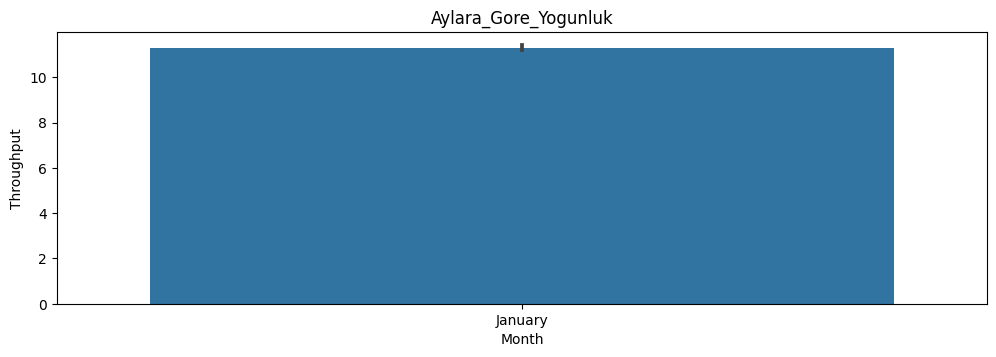

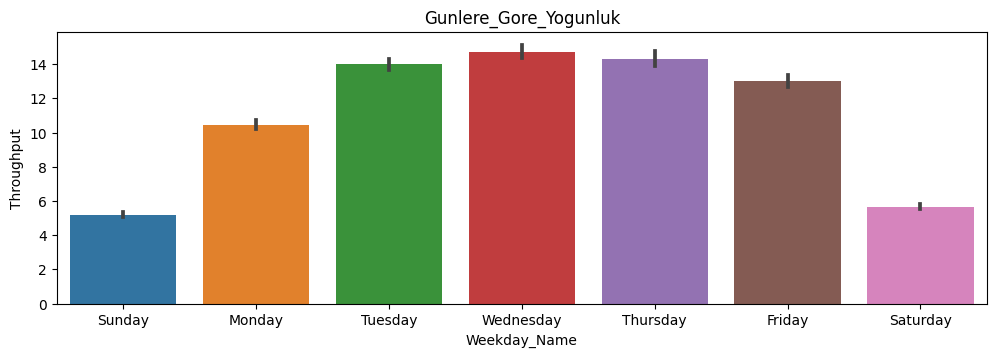

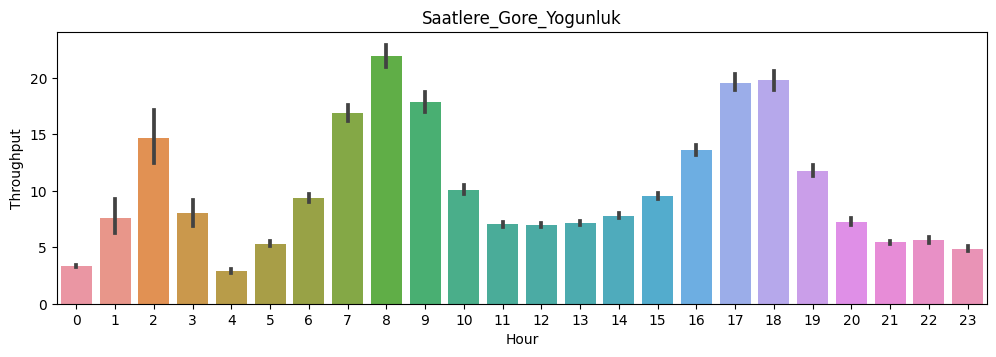

In [23]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(3,1,1)
ax=sns.barplot(x=df["Month_Name"],y=df["Throughput"])
ax.set_title("Aylara_Gore_Yogunluk")
ax.set_xlabel("Month")

fig=plt.figure(figsize=(12,12))
bx=fig.add_subplot(3,1,2)
bx=sns.barplot(x=df["Weekday_Name"],y=df["Throughput"])
bx.set_title("Gunlere_Gore_Yogunluk")

fig=plt.figure(figsize=(12,12))
cx=fig.add_subplot(3,1,3)
cx=sns.barplot(x=df["Hour"],y=df["Throughput"])
cx.set_title("Saatlere_Gore_Yogunluk")

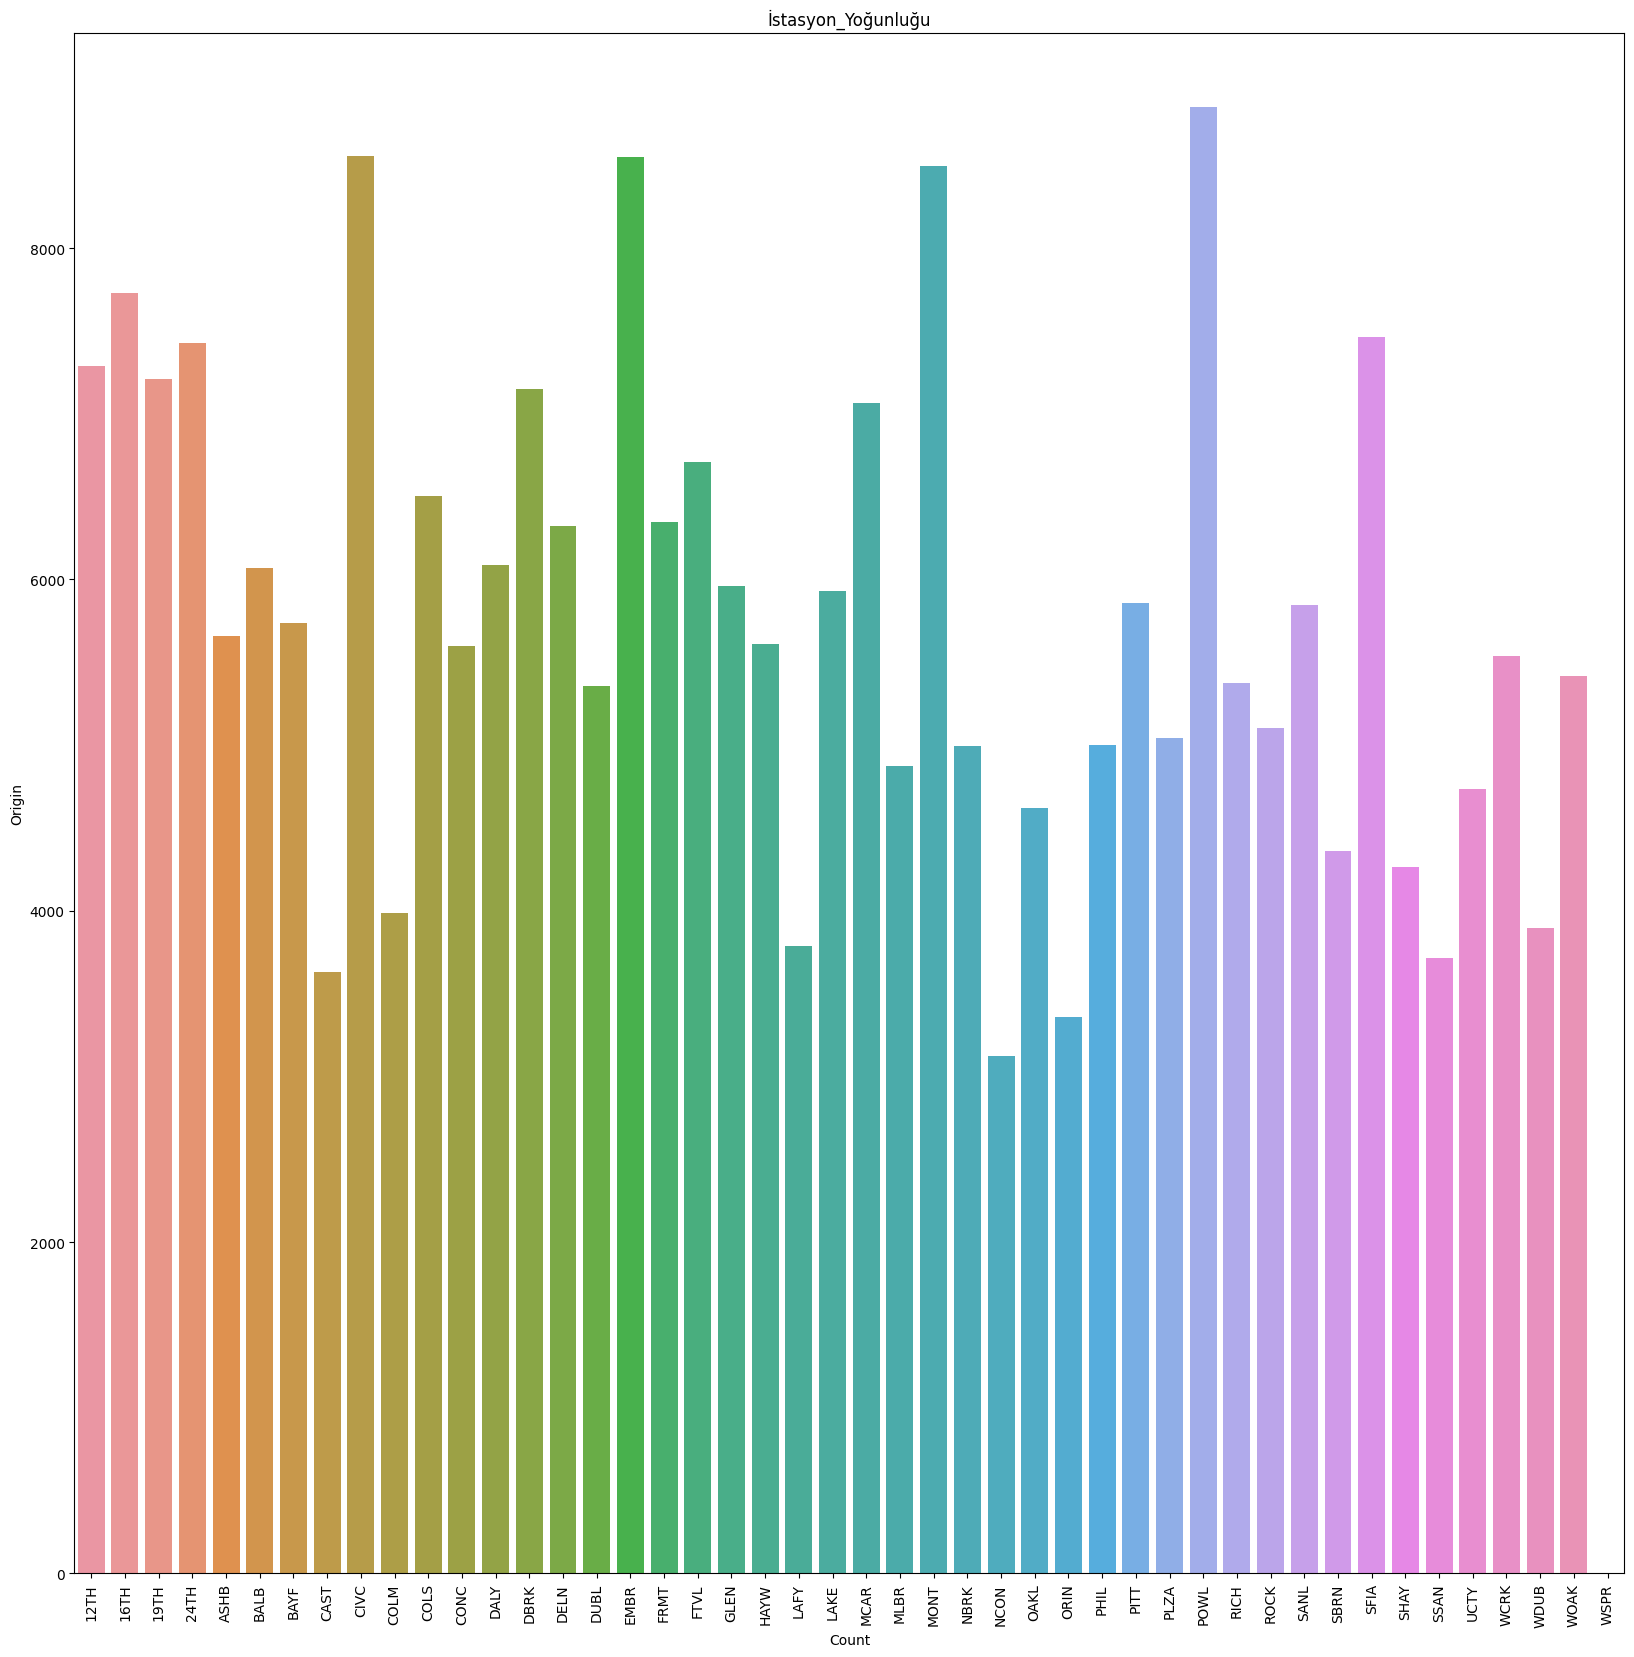

In [24]:
fig=plt.figure(figsize=(20, 20))
ax=sns.countplot(x=df["Origin"])  
ax.set_title("İstasyon_Yoğunluğu")
ax.set_xlabel("Count")
ax.set_ylabel("Origin")
plt.xticks(rotation=90);
#Hangi BART istasyonu en yoğun?
#En az popüler olan BART rotası hangisidir?

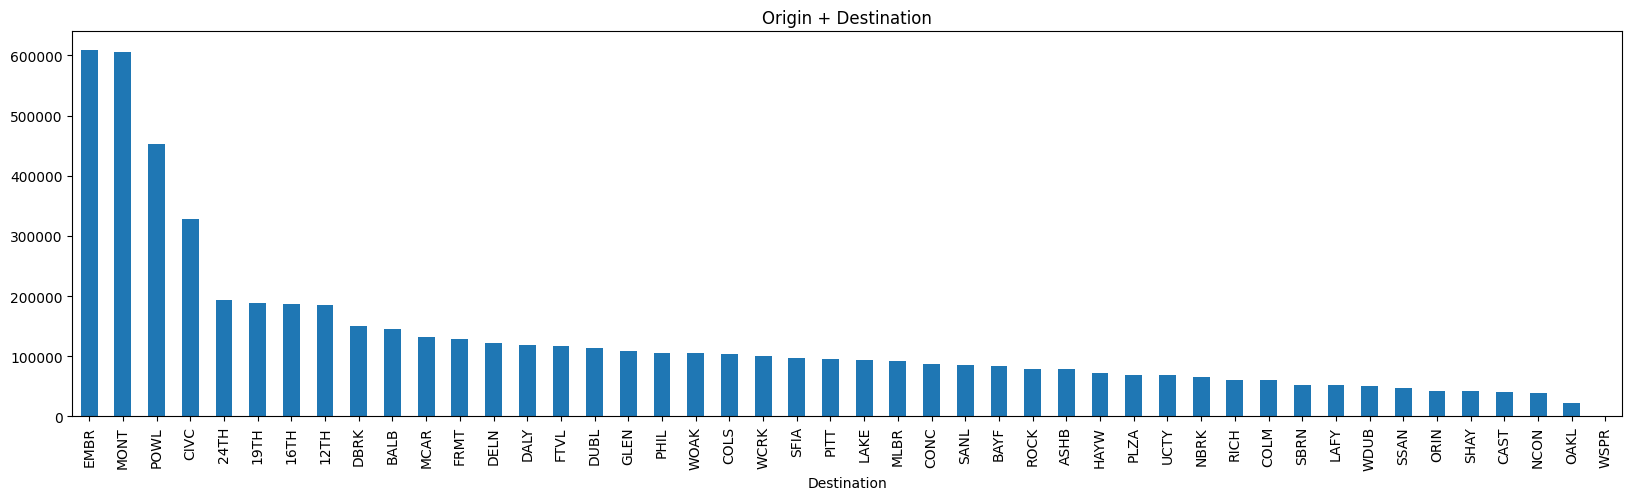

In [25]:
plt.figure(figsize=(20,5))
(df.groupby('Destination')['Throughput'].sum() + df.groupby('Origin')['Throughput'].sum()).sort_values(ascending=False).plot.bar()
plt.title('Origin + Destination');

In [26]:
x=df[["Month","Weekday","Hour"]]
y=df["Throughput"]

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
LR= LinearRegression()

In [29]:
pred=LR.fit(x_train,y_train).predict(x_test)

In [30]:
mean_squared_error(y_test,pred)**.5

32.91529428695353

In [31]:
r2_score(y_test,pred)

0.0044006945751199344

In [32]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00

In [34]:
from pycaret.regression import*
ex_name=setup(data=df,target="Throughput")
best_model=compare_models()

,Description,Value
0,Session id,3195
1,Target,Throughput
2,Target type,Regression
3,Original data shape,"(260218, 9)"
4,Transformed data shape,"(260218, 71)"
5,Transformed train set shape,"(182152, 71)"
6,Transformed test set shape,"(78066, 71)"
7,Numeric features,4
8,Categorical features,4
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:04:42
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.6119,266.2355,16.2837,0.7494,0.5348,0.8293,168.8340
knn,K Neighbors Regressor,6.4138,349.7582,18.6799,0.6704,0.7110,1.2475,28.0200
dt,Decision Tree Regressor,5.4199,385.0453,19.5738,0.6378,0.6453,0.8806,2.8390
et,Extra Trees Regressor,5.5044,393.6762,19.7930,0.6295,0.6189,0.9402,190.2150
gbr,Gradient Boosting Regressor,8.4681,540.6695,23.2345,0.4905,0.8818,1.8894,31.3730
lr,Linear Regression,11.9665,914.1376,30.2178,0.1382,1.1036,3.2307,5.6850
ridge,Ridge Regression,11.9664,914.1376,30.2178,0.1382,1.1036,3.2307,0.6780
br,Bayesian Ridge,11.9629,914.1376,30.2178,0.1382,1.1033,3.2286,2.0410
omp,Orthogonal Matching Pursuit,11.9267,915.0057,30.2323,0.1373,1.1017,3.2005,0.8260
en,Elastic Net,11.5346,923.2284,30.3676,0.1296,1.0789,2.9202,0.9790


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.6119,266.2355,16.2837,0.7494,0.5348,0.8293,168.8340
knn,K Neighbors Regressor,6.4138,349.7582,18.6799,0.6704,0.7110,1.2475,28.0200
dt,Decision Tree Regressor,5.4199,385.0453,19.5738,0.6378,0.6453,0.8806,2.8390
et,Extra Trees Regressor,5.5044,393.6762,19.7930,0.6295,0.6189,0.9402,190.2150
gbr,Gradient Boosting Regressor,8.4681,540.6695,23.2345,0.4905,0.8818,1.8894,31.3730
lr,Linear Regression,11.9665,914.1376,30.2178,0.1382,1.1036,3.2307,5.6850
ridge,Ridge Regression,11.9664,914.1376,30.2178,0.1382,1.1036,3.2307,0.6780
br,Bayesian Ridge,11.9629,914.1376,30.2178,0.1382,1.1033,3.2286,2.0410
omp,Orthogonal Matching Pursuit,11.9267,915.0057,30.2323,0.1373,1.1017,3.2005,0.8260
en,Elastic Net,11.5346,923.2284,30.3676,0.1296,1.0789,2.9202,0.9790
